# FITS Files in Astropy

__Author: Kaustubh Vaghmare__

## What's FITS!?

FITS stands for "__Flexible Image Transport System__". It is a file format designed by astronomers. And it is indeed flexible - it can store images (as 2-d arrays) and it can store tables (ASCII and binary). And a given file can have both - this allows one to attach tabular data directly to images. eg. a catalog of photometry can be attached to the image from which it was extracted. You can also store multi-dimensional data and more.

A FITS file is made of one or more header/data units (HDUs).

    Each HDU is made of a header unit which contains metadata in the form of a key-value pair. This part is compulsory.
    An optional component within a HDU is the data unit which contains the data unit.

Astropy has a sub-module for handling FITS files. Let's see how to load a file.


In [1]:
# First import the sub-module
from astropy.io import fits

# To load a FITS file
hdulist = fits.open('data/example.fits')

# This is a special type of list.
# Supports more or less all list operations.
# And some more (like writeto)
print(type(hdulist))

<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [2]:
# HDUList contains HDU objects.
print(type(hdulist[0]))

<class 'astropy.io.fits.hdu.image.PrimaryHDU'>


When dealing with a new file, the first obvious step is to examine the file and understand how data is organized in it.

In [3]:
print(hdulist.info())

Filename: data/example.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (512, 512)   int16   
None


So, this simple file contains just one HDU which has 71 entries in its header (cards) and data which has dimensions 512 x 512

Let's now see how the header of a given HDU can be examined. For convenience, we will create a variable pointing to it.

In [4]:
header = hdulist[0].header
print(header.cards)

('SIMPLE', True, 'Fits standard')
('BITPIX', 16, 'Bits per pixel')
('NAXIS', 2, 'Number of axes')
('NAXIS1', 512, 'Axis length')
('NAXIS2', 512, 'Axis length')
('EXTEND', False, 'File may contain extensions')
('ORIGIN', 'NOAO-IRAF FITS Image Kernel July 2003', 'FITS file originator')
('DATE', '2017-02-17T04:36:31', 'Date FITS file was generated')
('IRAF-TLM', '2017-02-17T04:36:31', 'Time of last modification')
('OBJECT', 'm51  B  600s', 'Name of the object observed')
('IRAF-MAX', 19936.0, 'DATA MAX')
('IRAF-MIN', -1.0, 'DATA MIN')
('CCDPICNO', 53, 'ORIGINAL CCD PICTURE NUMBER')
('ITIME', 600, 'REQUESTED INTEGRATION TIME (SECS)')
('TTIME', 600, 'TOTAL ELAPSED TIME (SECS)')
('OTIME', 600, 'ACTUAL INTEGRATION TIME (SECS)')
('DATA-TYP', 'OBJECT (0)', 'OBJECT,DARK,BIAS,ETC.')
('DATE-OBS', '05/04/87', 'DATE DD/MM/YY')
('RA', '13:29:24.00', 'RIGHT ASCENSION')
('DEC', '47:15:34.00', 'DECLINATION')
('EPOCH', 0.0, 'EPOCH OF RA AND DEC')
('ZD', '22:14:00.00', 'ZENITH DISTANCE')
('UT', ' 9:27:27.0

Header objects behave almost like dictionaries. So, you can query values and change them using a dictionary like syntax.

In [5]:
print(header['NAXIS1'])

512


In [6]:
print(header['NAXIS2'])

512


In [7]:
header['INSTRMNT'] = 'MyTelescope'

The data can be accessed using the data attribute of the HDU.

In [8]:
data = hdulist[0].data
print(type(data))

<class 'numpy.ndarray'>


/home/fengzi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


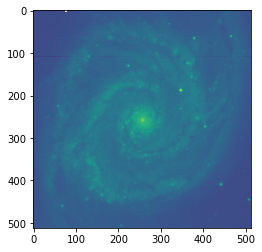

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.log(data))

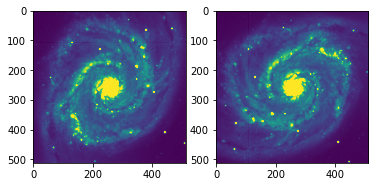

In [10]:
# Images in ZScale

from astropy.visualization import ZScaleInterval
z = ZScaleInterval()
z1, z2 = z.get_limits(data)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(data, vmin=z1, vmax=z2)
axes[1].imshow(data.T, vmin=z1, vmax=z2)

## Making a FITS file

In [11]:
import numpy.random as nr
data = nr.normal(0, 1, 262144).reshape(512, 512)

hdulist = fits.HDUList()
hdu1 = fits.PrimaryHDU()
hdu1.data = data
hdulist.append(hdu1)

hdulist.writeto('myFile.fits')

In [12]:
col1 = fits.Column(name='col1', format='E', array=nr.normal(0, 1, 10))
col2 = fits.Column(name='col2', format='E', array=nr.normal(3, 1, 10))
cols = fits.ColDefs([col1, col2])
hdu2 = fits.BinTableHDU.from_columns(cols)

hdulist.append(hdu2)
hdulist.writeto('myFile2.fits')

## Convenience Functions

Astropy's io.fits library comes with a whole bunch of convenience functions. This makes common operations with FITS file much easier.

```python
    header = fits.getheader('somefile.fits')
    naxis1 = fits.getval('somefile.fits', 'naxis1', 1)
    data = fits.getdata('some.fits', 2)

    fits.writeto('some.fits', data, header)
    fits.append('some.fits', data, header)
    fits.update('some.fits, data, header, 1)
```